<a href="https://colab.research.google.com/github/spyrosviz/Sports_Event_Analysis/blob/main/Football/Football_Shots_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Wyscout open source data, downloaded from figshare**

In [1]:
# Import libraries

import json
import pandas as pd
import numpy as np
!pip install mplsoccer
from mplsoccer import Pitch, Standardizer
import matplotlib.pyplot as plt

     |████████████████████████████████| 57 kB 5.1 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=f160722a24422b7b79996282a0a036a466a6421ce2d59034aaed9cc75ec6361c
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [2]:
# Import matches json

with open(r'/content/drive/MyDrive/Football_Shots_Display/teams.json') as file_3:
  teams = json.load(file_3)

df_teams = pd.json_normalize(teams,sep='_')
df_teams

,city,name,wyId,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
...,...,...,...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,national,Spain,724,ESP,ES
138,Beograd,Serbia,17322,Serbia,national,Serbia,688,SRB,RS
139,Bern,Switzerland,6697,Switzerland,national,Switzerland,756,CHE,CH
140,Warszawa,Poland,13869,Poland,national,Poland,616,POL,PL


In [3]:
italy_id = df_teams['wyId'][df_teams['name']=='Italy'].values
italy_id = int(italy_id)

In [4]:
# Import matches json

with open(r'/content/drive/MyDrive/Football_Shots_Display/matches/matches_European_Championship.json') as file_2:
  matches = json.load(file_2)

df_matches = pd.json_normalize(matches,sep='_')
print(df_matches.columns)
print(df_matches[['wyId','label']].copy())

Index(['status', 'roundId', 'gameweek', 'seasonId', 'dateutc', 'winner',
       'venue', 'wyId', 'label', 'date',
       ...
       'teamsData_8731_coachId', 'teamsData_8731_side',
       'teamsData_8731_teamId', 'teamsData_8731_score',
       'teamsData_8731_scoreP', 'teamsData_8731_hasFormation',
       'teamsData_8731_formation_bench', 'teamsData_8731_formation_lineup',
       'teamsData_8731_formation_substitutions', 'teamsData_8731_scoreHT'],
      dtype='object', length=278)
       wyId                                 label
0   1694440          Portugal - France, 1 - 0 (E)
1   1694439               Germany - France, 0 - 2
2   1694438               Portugal - Wales, 2 - 0
3   1694437               France - Iceland, 5 - 2
4   1694436            Germany - Italy, 1 - 1 (P)
5   1694435                Wales - Belgium, 3 - 1
6   1694434          Poland - Portugal, 1 - 1 (P)
7   1694433              England - Iceland, 1 - 2
8   1694432                  Italy - Spain, 2 - 0
9   1694431   

### **Let's to choose to analyze Germany vs Italy game which has matchId = 1694409**

In [5]:
# Import events json

with open(r'/content/drive/MyDrive/Football_Shots_Display/events/events_European_Championship.json') as file:
  events = json.load(file)

df_events = pd.json_normalize(events,sep='_')

In [6]:
df_italy = df_events[(df_events['teamId']==italy_id) & (df_events['matchId']==1694436)].copy()
df_italy

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
69604,7,Clearance,"[{'id': 1401}, {'id': 1802}]",20458,"[{'y': 65, 'x': 12}, {'y': 95, 'x': 24}]",1694436,Others on the ball,3757,1H,28.725706,71,89881636
69611,1,Ground defending duel,"[{'id': 502}, {'id': 701}, {'id': 1802}]",22566,"[{'y': 96, 'x': 10}, {'y': 96, 'x': 6}]",1694436,Duel,3757,1H,46.528257,12,89881640
69614,7,Clearance,"[{'id': 1401}, {'id': 1802}]",20459,"[{'y': 51, 'x': 9}, {'y': 85, 'x': 24}]",1694436,Others on the ball,3757,1H,50.521166,71,89881644
69622,8,Head pass,"[{'id': 1401}, {'id': 1802}]",22566,"[{'y': 83, 'x': 21}, {'y': 78, 'x': 44}]",1694436,Pass,3757,1H,71.247280,82,89881649
69626,7,Clearance,[{'id': 1802}],20458,"[{'y': 92, 'x': 28}, {'y': 73, 'x': 63}]",1694436,Others on the ball,3757,1H,80.369696,71,89881651
...,...,...,...,...,...,...,...,...,...,...,...,...
71558,9,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",20455,"[{'y': 100, 'x': 100}, {'y': 50, 'x': 10}]",1694436,Save attempt,3757,P,532.057738,90,89883763
71559,3,Penalty,"[{'id': 101}, {'id': 402}, {'id': 1207}, {'id'...",20395,"[{'y': 50, 'x': 89}, {'y': 100, 'x': 100}]",1694436,Free Kick,3757,P,571.901632,35,90602584
71562,9,Reflexes,"[{'id': 101}, {'id': 1204}, {'id': 1802}]",20455,"[{'y': 100, 'x': 100}, {'y': 50, 'x': 11}]",1694436,Save attempt,3757,P,610.122681,90,89883767
71563,3,Penalty,"[{'id': 402}, {'id': 1201}, {'id': 1802}]",21095,"[{'y': 50, 'x': 89}, {'y': 100, 'x': 100}]",1694436,Free Kick,3757,P,644.115328,35,90602585


In [7]:
df_italy['subEventName'].unique()

array(['Clearance', 'Ground defending duel', 'Head pass', 'Throw in',
       'Simple pass', 'High pass', 'Air duel', 'Ground attacking duel',
       'Cross', 'Corner', 'Shot', 'Touch', 'Smart pass', '',
       'Ground loose ball duel', 'Goal kick', 'Free Kick', 'Hand pass',
       'Foul', 'Acceleration', 'Launch', 'Save attempt', 'Hand foul',
       'Late card foul', 'Reflexes', 'Penalty', 'Simulation'],
      dtype=object)

In [8]:
# Select all shots
df_corners = df_italy[df_italy['subEventName']=='Corner'].copy()
df_corners

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
69663,3,Corner,[{'id': 1802}],22566,"[{'y': 100, 'x': 100}, {'y': 56, 'x': 90}]",1694436,Free Kick,3757,1H,234.053595,30,89881701
69677,3,Corner,[{'id': 1801}],22566,"[{'y': 0, 'x': 100}, {'y': 18, 'x': 82}]",1694436,Free Kick,3757,1H,311.286317,30,89881722
70321,3,Corner,"[{'id': 801}, {'id': 1802}]",22566,"[{'y': 0, 'x': 100}, {'y': 60, 'x': 92}]",1694436,Free Kick,3757,1H,2620.326936,30,89882434
70836,3,Corner,"[{'id': 801}, {'id': 1801}]",22566,"[{'y': 100, 'x': 100}, {'y': 58, 'x': 95}]",1694436,Free Kick,3757,2H,1867.431985,30,89882998
70889,3,Corner,"[{'id': 801}, {'id': 1802}]",22566,"[{'y': 0, 'x': 100}, {'y': 45, 'x': 89}]",1694436,Free Kick,3757,2H,2165.060735,30,89883052


In [9]:
# Find coordinates of shots made

x0 = np.array([i[0]['x'] for i in df_corners['positions'].values])
y0 = np.array([i[0]['y'] for i in df_corners['positions'].values])
x1 = np.array([i[1]['x'] for i in df_corners['positions'].values])
y1 = np.array([i[0]['x'] for i in df_corners['positions'].values])

# setup the Standardizer
wyscout_to_statsbomb = Standardizer(pitch_from='wyscout', pitch_to='statsbomb')
# transform the coordinates and save to the dataframe
x0_transf, y0_transf = wyscout_to_statsbomb.transform(x0,y0)
x1_transf, y1_transf = wyscout_to_statsbomb.transform(x1,y1)
print(x0_transf,x1_transf)
print(y0_transf,y1_transf)

[120. 120. 120. 120. 120.] [108.          99.52941176 111.         115.         107.        ]
[80.  0.  0. 80.  0.] [80. 80. 80. 80. 80.]


## **Create Pitch**

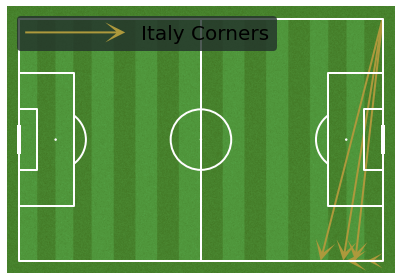

In [10]:
custom_pitch = Pitch(pitch_type='statsbomb',pitch_color='grass',line_color='white',
                             half=False, line_zorder=3,stripe=True)

#ax_custom = fig.add_axes((0.55, 0.05, 0.4, 0.4 * FIGWIDTH/FIGHEIGHT / custom_pitch.ax_aspect))

fig,ax = custom_pitch.draw()

custom_pitch.arrows(x0_transf, y0_transf,
             x1_transf, y1_transf, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Italy Corners')

ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# **2. Statsbomb API data**

In [11]:
!pip install statsbombpy
from statsbombpy import sb

     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 141 kB 42.9 MB/s 
     |████████████████████████████████| 207 kB 46.1 MB/s 
     |████████████████████████████████| 127 kB 52.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3 which is incompatib

In [12]:
competitions = sb.competitions()
competitions

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,None,None,None,None


## **Let's attemp to import Fifa World Cup, season 2018**

In [13]:
matches = sb.matches(competition_id=43,season_id=3)
matches

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,7578,2018-06-15,14:00:00.000,International - FIFA World Cup,2018,Egypt,Uruguay,0,1,available,scheduled,2021-12-06T22:24:47.980215,2021-06-13T16:17:31.694,1,Group Stage,Ekaterinburg Arena,Björn Kuipers,Héctor Raúl Cúper,Óscar Washington Tabárez Silva,1.0.2,None,None
1,7553,2018-06-23,17:00:00.000,International - FIFA World Cup,2018,South Korea,Mexico,1,2,available,scheduled,2021-12-06T23:00:56.479071,2021-06-13T16:17:31.694,2,Group Stage,Rostov Arena,Milorad Mažić,Tae-Yong Shin,Juan Carlos Osorio Arbeláez,1.0.2,None,None
2,7544,2018-06-20,17:00:00.000,International - FIFA World Cup,2018,Uruguay,Saudi Arabia,1,0,available,scheduled,2021-12-06T22:50:22.229925,2021-06-13T16:17:31.694,2,Group Stage,Rostov Arena,Clément Turpin,Óscar Washington Tabárez Silva,Juan Antonio Pizzi Torroja,1.0.2,None,None
3,7536,2018-06-18,17:00:00.000,International - FIFA World Cup,2018,Belgium,Panama,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,1,Group Stage,Olimpiyskiy Stadion Fisht (Sochi),Janny Sikazwe,Roberto Martínez Montoliú,Hernán Darío Gómez Jaramillo,1.0.2,None,None
4,7555,2018-06-24,20:00:00.000,International - FIFA World Cup,2018,Poland,Colombia,0,3,available,scheduled,2021-12-06T23:06:14.060164,2021-06-13T16:17:31.694,2,Group Stage,Kazan'' Arena (Kazan'),César Arturo Ramos Palazuelos,Adam Nawałka,José Néstor Pekerman,1.0.2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7540,2018-06-19,20:00:00.000,International - FIFA World Cup,2018,Russia,Egypt,3,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Saint-Petersburg Stadium,Enrique Cáceres,Stanislav Cherchesov,Héctor Raúl Cúper,1.0.2,None,None
60,8652,2018-07-07,20:00:00.000,International - FIFA World Cup,2018,Russia,Croatia,2,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Quarter-finals,Olimpiyskiy Stadion Fisht (Sochi),Sandro Ricci,Stanislav Cherchesov,Zlatko Dalić,1.0.2,None,None
61,7563,2018-06-26,16:00:00.000,International - FIFA World Cup,2018,Denmark,France,0,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Group Stage,Stadion Luzhniki,Sandro Ricci,Åge Fridtjof Hareide,Didier Deschamps,1.0.2,None,None
62,7556,2018-06-24,17:00:00.000,International - FIFA World Cup,2018,Japan,Senegal,2,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Ekaterinburg Arena,Gianluca Rocchi,Akira Nishino,Aliou Cissé,1.0.2,None,None


In [14]:
events = sb.events(match_id=8657)
events.head(5)

credentials were not supplied. open data access only


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_recipient,pass_shot_assist,pass_switch,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_redirect,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04198d50-c681-4522-a809-683dea2e8f18,1,NaN,NaN,8657,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Belgium,782,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Belgium,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,efe191f7-d38f-414d-8950-db48af1bd59b,2,NaN,NaN,8657,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Belgium,782,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",England,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0d585e73-42cc-49ec-902c-d1fed3551f95,3,NaN,NaN,8657,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Belgium,782,[75caf5e3-e038-4d52-b968-0df8bce24a8a],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75caf5e3-e038-4d52-b968-0df8bce24a8a,4,NaN,NaN,8657,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Belgium,782,[0d585e73-42cc-49ec-902c-d1fed3551f95],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3a7998c7-7c3b-4c86-ab28-ce8808bd305a,2414,NaN,NaN,8657,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,73,Belgium,782,[960f48b1-75a5-4796-80af-c338f85474b0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN


In [15]:
'Belgium - England'

df = events[['possession_team','location','pass_end_location','player','minute']].copy()

# select data for Belgium and for Thomas Meunier second half of the game
selectedteam = 'Belgium'
selectedplayer = 'Thomas Meunier'
df = df[(df['possession_team']==selectedteam) & (df['player']==selectedplayer) & (df['minute']>45)].copy()
df.dropna(inplace=True)

x0 = [i[0] for i in df['location'].values]
y0 = [i[1] for i in df['location'].values]
x1 = [i[0] for i in df['pass_end_location'].values]
y1 = [i[1] for i in df['pass_end_location'].values]

print(df.head())

    possession_team      location pass_end_location          player  minute
751         Belgium  [94.0, 59.0]      [90.0, 57.0]  Thomas Meunier      55
802         Belgium  [40.0, 77.0]      [28.0, 76.0]  Thomas Meunier      58
836         Belgium  [48.0, 78.0]      [41.0, 76.0]  Thomas Meunier      61
839         Belgium  [60.0, 79.0]      [34.0, 76.0]  Thomas Meunier      61
853         Belgium  [72.0, 70.0]      [76.0, 75.0]  Thomas Meunier      62


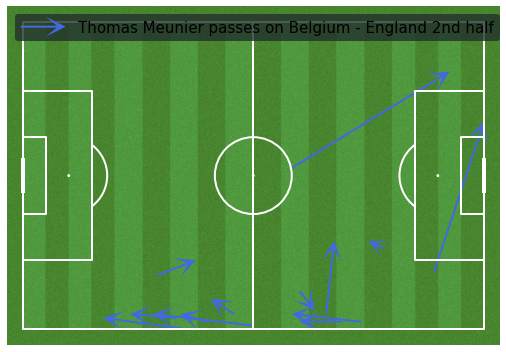

In [16]:
# Plot passes on pitch

custom_pitch = Pitch(pitch_type='statsbomb',pitch_color='grass',line_color='white',
                             half=False, line_zorder=3,stripe=True)

fig, ax = custom_pitch.draw(figsize=(10, 5))

custom_pitch.arrows(x0, y0,
             x1, y1, width=2,
             headwidth=10, headlength=10, color='royalblue', ax=ax, label=selectedplayer + ' passes on Belgium - England 2nd half')

ax.legend(facecolor='#22312b', handlelength=3, edgecolor='None', fontsize=15, loc='upper left')